In [ ]:
"""
1. Plot cityscapes image with its mask: DONE
2. Filter out category to detect: car, pedestrian, ...: DONE
3. Get box from mask to train VitDet and DETR: DONE
4. Draw box and mask from coco file to check
3. Train VitDet
4. Train Detr
"""

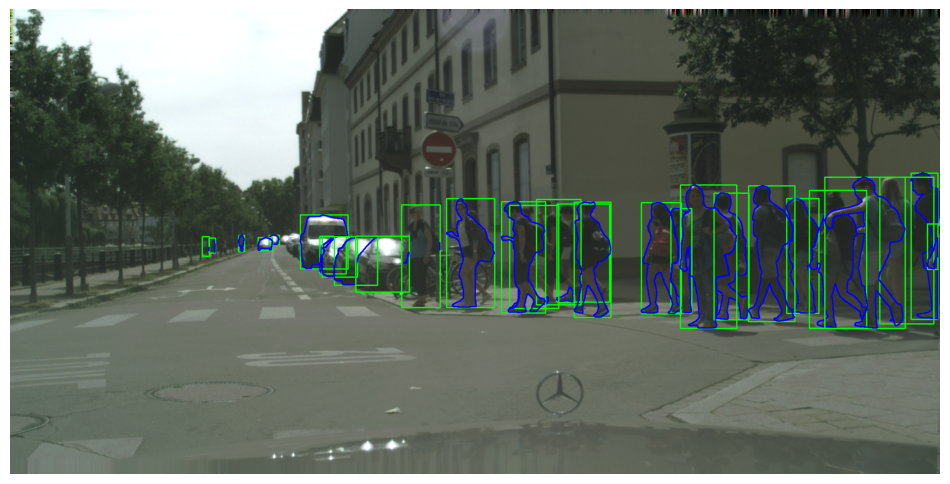

In [10]:
import json
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Path to the COCO format JSON file
json_file_path = 'dataset_zoo/city_scapes/instances_coco/instancesonly_filtered_gtFine_train.json'

# Path to the images directory
images_dir = 'dataset_zoo/city_scapes'

# Load the JSON file
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Get a random image entry from the dataset
random_image_entry = random.choice(data['images'])

# Load image using OpenCV
image_path = os.path.join(images_dir, random_image_entry['file_name'])
image = cv2.imread(image_path)

# Iterate through annotations and draw bounding boxes and contours
for annotation in data['annotations']:
    if annotation['image_id'] == random_image_entry['id']:
        bbox = annotation['bbox']
        bbox = [int(coord) for coord in bbox]
        cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

        segmentation = annotation['segmentation'][0]
        contour = [(segmentation[i], segmentation[i + 1]) for i in range(0, len(segmentation), 2)]
        contour = np.array(contour, dtype=np.int32)
        cv2.drawContours(image, [contour], -1, (255, 0, 0), 2)

# Display the image with bounding boxes and contours
_ = plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
